# Overview of CDCL Strategies in *RoundingSat* for Optimization Problems

This document provides a complete analysis of the performance of the pseudo-Boolean solver *RoundingSat* in which
we compare the impact of the use of different CDCL strategies for solving optimization problems.

By default, this document is **not** dynamic, so as to be readable on GitLab.
You may switch to a dynamic document by setting the variable `dynamic` to `True`, and re-run this Jupyter Notebook (the serialized results of the campaign are also available in this directory).
Note that the [*latest version of Metrics*](https://pypi.org/project/crillab-metrics/) must be installed in your environment to run this notebook.

In [1]:
dynamic = False
figsize = (10, 7)

## Loading the experiments

First, let us load the experiments with *Metrics*.
We note that an experiment will be considered as successfull when the solver has been able to either find at least one satisfying assignment (without requiring that this assignment is optimal) or to prove unsatisfiability.
Otherwise, the solver did not have enough time to decide the satisfiability of the formula, and either outputed `UNKNOWN` or nothing (if it did not have enough time to handle the `SIGTERM` signal).

In [2]:
from os import path
from pandas import isnull
from metrics.wallet import Analysis, import_analysis

In [3]:
campaign_name = 'roundingsat-optim'

def is_success(xp):
    values = xp['objective_values']
    value_found = values is not None
    return value_found

if path.exists(f'{campaign_name}-sat.json'):
    # Loading the serialized campaign.
    with open(f'{campaign_name}-sat.json') as json_analysis:
        roundingsat_optim = import_analysis(json_analysis.read())

else:
    # Extracting the campaign from the log files of the experiments, and serializing it for later use.
    roundingsat_optim = Analysis(f'{campaign_name}.yml', is_success=is_success)
    with open(f'{campaign_name}-sat.json', 'w') as json_analysis:
        json_analysis.write(roundingsat_optim.export())

We now add a new information to the experiments corresponding to the best value that has been found by the solver for the objective function, provided it has found any value.

In [4]:
def extract_best(row):
    if row['objective_values']:
        values = row['objective_values']
        if isnull(values):
            return None
        values = eval(values)
        if type(values) == int or type(values) == float:
            return values
        return values[-1]
    return 0

roundingsat_optim = roundingsat_optim.map(new_col='best_found', function=extract_best)

We now keep the list of all the considered solvers to easily retrieve them later on.

In [5]:
all_solvers = roundingsat_optim.campaign_df.xp_ware_names

In [6]:
solver_map = {
    'best': 'bump-assigned (each) - restart-delete-lbd-e',
    'default': 'default',
    'master': 'master (a17b7d0)',
    'VBS': 'VBS'
}

## Pairwise Comparison of the Configurations

Let us now compare the performance of the different configuration of *RoundingSat*, by comparing each default configuration of the different solvers to their best configurations.

### Comparison between the default configuration and the best configuration

<AxesSubplot:title={'center':'Comparison of default and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='default', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

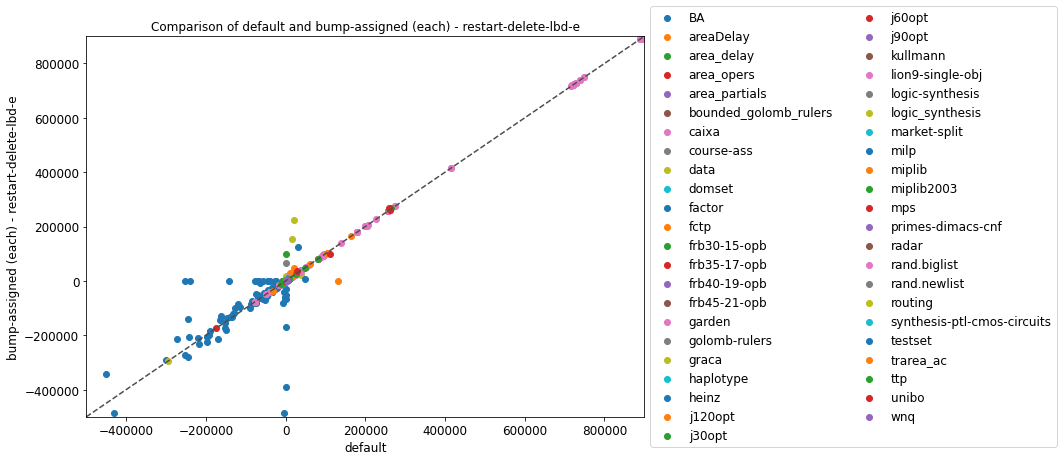

In [7]:
roundingsat_optim.sub_analysis('experiment_ware', ['best', 'default'])\
                 .get_only_common_success()\
                 .get_scatter_plot(scatter_col='best_found',
                                   xp_ware_x='default',
                                   xp_ware_y='best',
                             
                                   title='Scatter Plot of the Best Objective Values',
                                   color_col='family',
                                   xp_ware_name_map=solver_map,

                                   x_min=-500000, x_max=900000, logx=False,
                                   y_min=-500000, y_max=900000, logy=False,

                                   bbox_to_anchor=(1, 0.5),
                                   legend_location='center left',
                                   ncol_legend=2,
                             
                                   figsize=figsize,

                                   dynamic=dynamic)

### Comparison between master and the best configuration

<AxesSubplot:title={'center':'Comparison of master (a17b7d0) and bump-assigned (each) - restart-delete-lbd-e'}, xlabel='master (a17b7d0)', ylabel='bump-assigned (each) - restart-delete-lbd-e'>

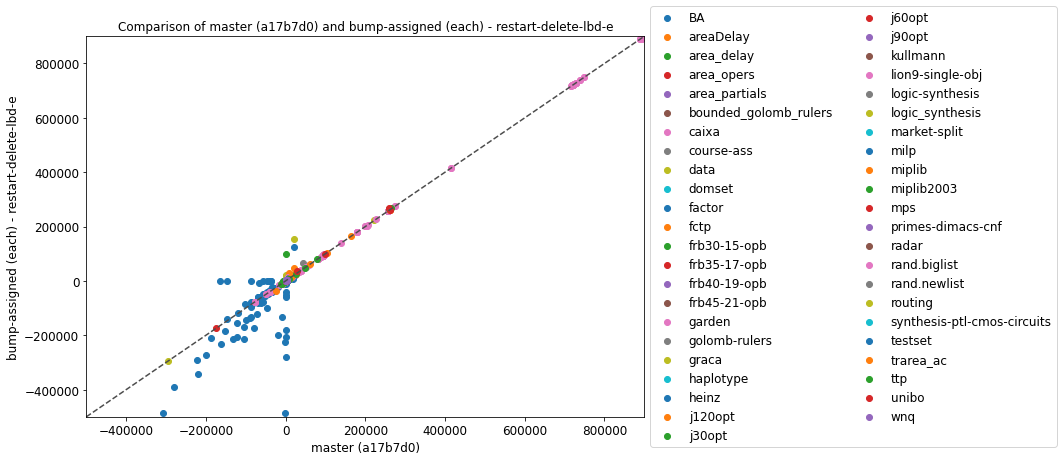

In [8]:
roundingsat_optim.sub_analysis('experiment_ware', ['best', 'master'])\
                 .get_only_common_success()\
                 .get_scatter_plot(scatter_col='best_found',
                                   xp_ware_x='master',
                                   xp_ware_y='best',
                             
                                   title='Scatter Plot of the Best Objective Values',
                                   color_col='family',
                                   xp_ware_name_map=solver_map,

                                   x_min=-500000, x_max=900000, logx=False,
                                   y_min=-500000, y_max=900000, logy=False,

                                   bbox_to_anchor=(1, 0.5),
                                   legend_location='center left',
                                   ncol_legend=2,
                             
                                   figsize=figsize,

                                   dynamic=dynamic)